In [9]:
#@title Librerias
from IPython.display import Audio
import numpy as np
import scipy.io.wavfile as wav
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
from scipy.io.wavfile import read, write
from scipy.signal import butter, bilinear, lfilter

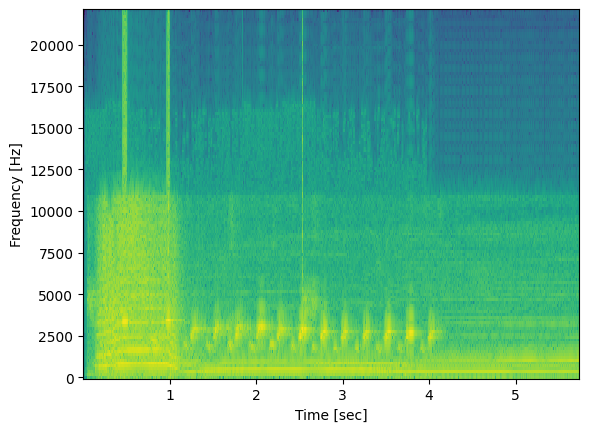

In [2]:
#@title Espectrograma
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
from scipy.signal import spectrogram

# Carga el archivo de audio
fs, audio_data = wavfile.read('Naturaleza_sin.wav')

# Calcula el espectrograma
frequencies, times, Sxx = spectrogram(audio_data, fs)

# Visualiza el espectrograma
plt.pcolormesh(times, frequencies, 10 * np.log10(Sxx))
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()

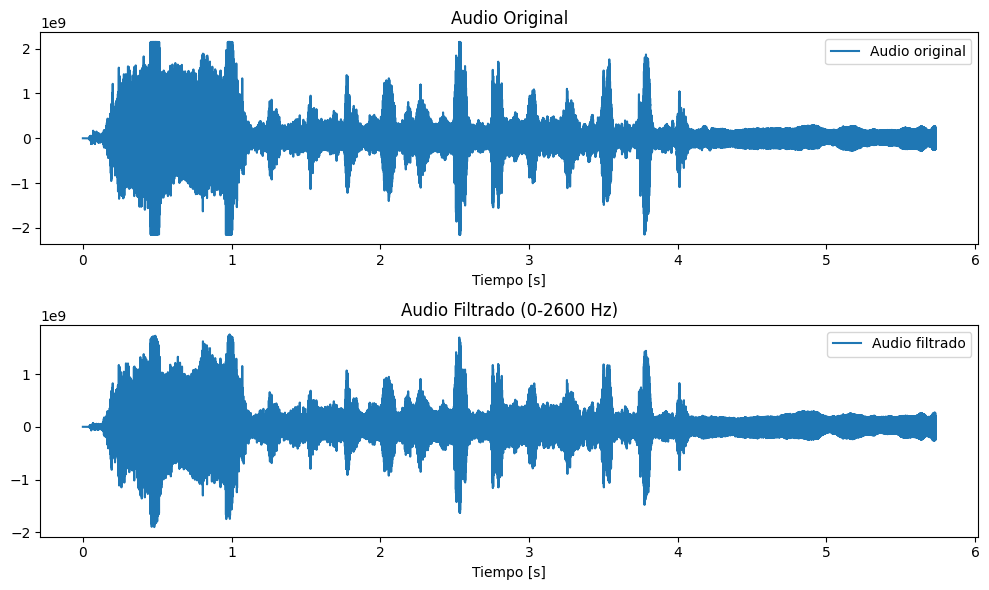

In [18]:
#@title Rango de analisis
# Especificaciones del filtro
orden = 1
frec_corte_low = 100.0  # Frecuencia de corte baja
frec_corte_high = 2600.0  # Frecuencia de corte alta
frec_corte_low_norm = frec_corte_low / (0.5 * fs)
frec_corte_high_norm = frec_corte_high / (0.5 * fs)

# Diseñar filtro Butterworth de primer orden
b, a = butter(orden, [frec_corte_low_norm, frec_corte_high_norm], btype='band', analog=False, output='ba')

# Cargar archivo de audio
fs, audio_data = wav.read('Naturaleza_sin.wav')

# Aplicar el filtro al audio
audio_filtrado = lfilter(b, a, audio_data)

# Graficar la forma de onda del audio original y filtrado
plt.figure(figsize=(10, 6))

plt.subplot(2, 1, 1)
plt.plot(np.arange(len(audio_data)) / fs, audio_data, label='Audio original')
plt.title('Audio Original')
plt.xlabel('Tiempo [s]')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(np.arange(len(audio_filtrado)) / fs, audio_filtrado, label='Audio filtrado')
plt.title('Audio Filtrado (0-2600 Hz)')
plt.xlabel('Tiempo [s]')
plt.legend()

plt.tight_layout()
plt.show()

In [19]:
#@title Escuchar audio con primer filtrado
Audio(audio_filtrado,rate=fs)

In [20]:
#@title Procesamiento
import numpy as np
from matplotlib.pylab import *
import scipy.signal as signal
import scipy.fftpack as fourier
from scipy.io.wavfile import read
from IPython.display import Audio


def choose_windows(name='Hamming', N=20):
    # Rect/Hanning/Hamming
    if name == 'Hamming':
        window = np.array([0.54 - 0.46 * np.cos(2 * np.pi * n / (N - 1)) for n in range(N)])
    elif name == 'Hanning':
        window = np.array([0.5 - 0.5 * np.cos(2 * np.pi * n / (N - 1)) for n in range(N)])
    elif name == 'Rect':
        window = np.ones(N)
    elif name == 'black':
        window = np.array([0.42-0.5*np.cos((2*np.pi*n)/(N-1))+0.08*np.cos((4*np.pi*n)/(N-1))for n in range(N)])
    return window



def pasa_banda(fc1,fc2,fs_audio,audio_data):
    fs=44100 # frec de muestreo
    BW=20 # Ancho de banda en la banda de transicion

    wc1 = 2*np.pi*fc1/fs # frecuencia de corte normalizada en radianes
    wc2 = 2*np.pi*fc2/fs # frecuencia de corte normalizada en radianes

    bwn=BW/fs # ancho de banda  normalizado en radianes

    M=int(4/bwn) # orden estimado del filtro

    n = np.arange(-M,M)

    h1 = -(wc1)/np.pi * np.sinc(wc1*(n)/np.pi) + (wc2)/np.pi * np.sinc(wc2*(n)/np.pi) # Respuesta del filtro ideal

    h1[n==0]=(wc2-wc1)/np.pi #Cuando es pasa bandas

    win2 = choose_windows(name='Rect', N=len(n))

    h2=h1*win2 # Multiplico la respuesta ideal por la ventana

    filtered_audio = np.convolve(audio_data, h2, mode='same')
    return [fs_audio,filtered_audio]


def maxima_energia(filtered_audio):
    fft_result = np.fft.fft(filtered_audio)
    freqs = np.fft.fftfreq(len(filtered_audio), 1 / fs)

   # Encuentra la frecuencia donde la magnitud es máxima
    max_magnitude_index = np.argmax(np.abs(fft_result))
    max_magnitude_frequency = freqs[max_magnitude_index]
    max_magnitude_value = np.abs(fft_result[max_magnitude_index])
    if(max_magnitude_value<=1401791626162.499):
      max_magnitude_frequency=0
    if(max_magnitude_frequency<0):
      max_magnitude_frequency=0
    return max_magnitude_frequency



lista_de_audios=[]
for i in range(0, 2501, 500):
    fs,filtrado=pasa_banda(i,i+500,fs,audio_filtrado);
    frecuencia=maxima_energia(filtrado)
    if(frecuencia>0):
      if(frecuencia>2000):
        fs,filtrado=pasa_banda(frecuencia-500,frecuencia+500,fs,audio_filtrado);
      else:
        fs,filtrado=pasa_banda(frecuencia-100,frecuencia+100,fs,audio_filtrado);

      lista_de_audios.append(Audio(filtrado,rate=fs))






In [ ]:
#@title Resultados
from IPython.display import Audio, display, clear_output
import ipywidgets as widgets


# Crea botones para cada audio
botones = [widgets.Button(description=f"Audio {i+1}") for i in range(len(lista_de_audios))]

# Función de reproducción
def reproducir_audio(boton):
    idx = int(boton.description.split()[-1]) - 1
    display(lista_de_audios[idx])

# Asocia la función de reproducción a cada botón
for boton in botones:
    boton.on_click(reproducir_audio)

# Muestra los botones
display(*botones)